**MUHAMMAD ISMAIL**

**PYTN-KS08-011**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mail2418","key":"784e529f058f35edd5174910c6d63425"}'}

In [ ]:
# membuat directory dari kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d jboysen/london-crime

100% 121M/121M [00:01<00:00, 106MB/s] 
100% 121M/121M [00:01<00:00, 74.1MB/s]


In [ ]:
# unzip dan lihat list dataset
!mkdir london-crime
!unzip london-crime.zip -d london_crime

Archive:  london-crime.zip
  inflating: london_crime/london_crime_by_lsoa.csv  


In [ ]:
df = pd.read_csv('/content/london_crime/london_crime_by_lsoa.csv')
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


Melihat tipe data yang terdapat pada features

- **lsoa_code** : represents policing area
- **borough** : the london borough for which the statistic is related
- **major_category** : the major crime category
- **minor_category** : the minor crime category
- **value** : the count of the crime for that particular borough, in that particular month 
- **year** : the year of the summary statistic
- **month** : the month of the summary statistic

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


Melihat statistik dari features yang ada

In [ ]:
df.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


Kita cek apakah features yang tersedia memuat null

In [ ]:
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

# EDA (Exploratory Data Analysis) dan Preprocessing

Kita hapus ID dari kasus kriminal di london

In [ ]:
df.drop(columns=['lsoa_code'], inplace=True)

In [ ]:
df.dtypes

borough           object
major_category    object
minor_category    object
value              int64
year               int64
month              int64
dtype: object

kita encode categorical features yang terdapat pada dataset sehingga dapat mempermudah pengolahan data

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
new_df = df.copy()
new_df['borough'] = label_encoder.fit_transform(new_df['borough'])
new_df['major_category'] = label_encoder.fit_transform(new_df['major_category'])
new_df['minor_category'] = label_encoder.fit_transform(new_df['minor_category'])
new_df.head()

,borough,major_category,minor_category,value,year,month
0,7,0,1,0,2016,11
1,10,8,23,0,2016,11
2,4,8,23,0,2015,5
3,25,0,1,0,2016,3
4,31,5,24,0,2008,6


In [ ]:
borough_encoder = {'Borough Before encode' : np.unique(df.borough),
                   'Borough after encode' : np.unique(new_df.borough)}

major_category_encoder = {'Borough Before encode' : np.unique(df.major_category),
                   'Borough after encode' : np.unique(new_df.major_category)}

minor_category_encoder = {'Borough Before encode' : np.unique(df.minor_category),
                   'Borough after encode' : np.unique(new_df.minor_category)}

In [ ]:
borough_encoder = pd.DataFrame(data=borough_encoder)
borough_encoder

,Borough Before encode,Borough after encode
0,Barking and Dagenham,0
1,Barnet,1
2,Bexley,2
3,Brent,3
4,Bromley,4
5,Camden,5
6,City of London,6
7,Croydon,7
8,Ealing,8
9,Enfield,9


In [ ]:
major_category_encoder = pd.DataFrame(data=major_category_encoder)
major_category_encoder

,Borough Before encode,Borough after encode
0,Burglary,0
1,Criminal Damage,1
2,Drugs,2
3,Fraud or Forgery,3
4,Other Notifiable Offences,4
5,Robbery,5
6,Sexual Offences,6
7,Theft and Handling,7
8,Violence Against the Person,8


In [ ]:
minor_category_encoder = pd.DataFrame(data=minor_category_encoder)
minor_category_encoder

,Borough Before encode,Borough after encode
0,Assault with Injury,0
1,Burglary in Other Buildings,1
2,Burglary in a Dwelling,2
3,Business Property,3
4,Common Assault,4
5,Counted per Victim,5
6,Criminal Damage To Dwelling,6
7,Criminal Damage To Motor Vehicle,7
8,Criminal Damage To Other Building,8
9,Drug Trafficking,9


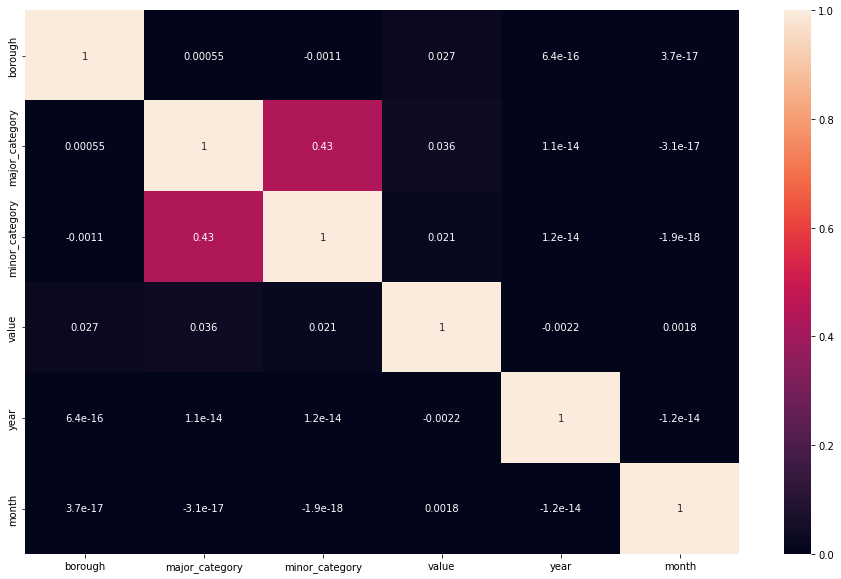

In [ ]:
plt.figure(figsize=(16,10))
sns.heatmap(new_df.corr(), annot=True, vmin=0, vmax=1)

# Bar Plot

In [ ]:
all_criminal_in_london = new_df[['borough','value']]
all_criminal_in_london.groupby(['borough']).sum()

,value
borough,
0,149447
1,212191
2,114136
3,227551
4,184349
5,275147
6,780
7,260294
8,251562


Menentukan banyaknya kejadian criminal di beberapa daerah london

In [ ]:
group1 = all_criminal_in_london.groupby(['borough']).sum()
group1.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
           dtype='int64', name='borough')

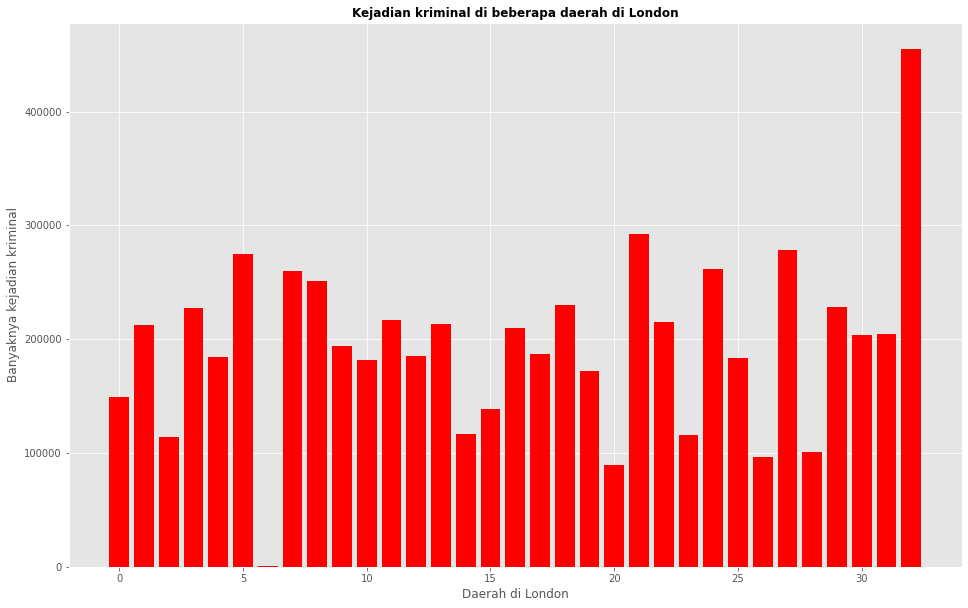

In [ ]:
plt.style.use('ggplot')

plt.figure(figsize=(16,10))
plt.bar(group1.index,group1.values.reshape(33,), color='red')
plt.title("Kejadian kriminal di beberapa daerah di London", fontsize=12, fontweight="bold")
plt.xlabel("Daerah di London")
plt.ylabel("Banyaknya kejadian kriminal")
plt.show()

# Histogram Plot

In [ ]:
new_df.head()

,borough,major_category,minor_category,value,year,month
0,7,0,1,0,2016,11
1,10,8,23,0,2016,11
2,4,8,23,0,2015,5
3,25,0,1,0,2016,3
4,31,5,24,0,2008,6


In [ ]:
minor_category_criminal_yearly = new_df[['year','minor_category']]
minor_category_criminal_monthly = new_df[['month','minor_category']]
major_category_criminal_yearly = new_df[['year','major_category']]
major_category_criminal_monthly = new_df[['month','major_category']]

In [ ]:
minor_category_criminal_yearly.groupby('minor_category').agg(lambda x:x.value_counts().index[0])

,year
minor_category,
0,2008
1,2016
2,2013
3,2014
4,2009
5,2015
6,2011
7,2015
8,2013


In [ ]:
minor_category_criminal_monthly.groupby('minor_category').agg(lambda x:x.value_counts().index[0])

,month
minor_category,
0,5
1,11
2,9
3,9
4,6
5,11
6,6
7,2
8,9


In [ ]:
major_category_criminal_monthly.groupby('major_category').agg(lambda x:x.value_counts().index[0])

,month
major_category,
0,11
1,9
2,10
3,11
4,2
5,6
6,10
7,5
8,11


In [ ]:
major_category_criminal_yearly.groupby('major_category').agg(lambda x:x.value_counts().index[0])

,year
major_category,
0,2016
1,2013
2,2009
3,2015
4,2015
5,2008
6,2016
7,2012
8,2016


In [ ]:
group2 = minor_category_criminal_yearly.groupby('minor_category').agg(lambda x:x.value_counts().index[0])
group3 = minor_category_criminal_monthly.groupby('minor_category').agg(lambda x:x.value_counts().index[0])
group4 = major_category_criminal_monthly.groupby('major_category').agg(lambda x:x.value_counts().index[0])
group5 = major_category_criminal_yearly.groupby('major_category').agg(lambda x:x.value_counts().index[0])

In [ ]:
group4.values.shape

(9, 1)

In [ ]:
list_group = list([group2,group3,group4,group5])
list_value = list([group2.values.reshape(32,),group3.values.reshape(32,),group4.values.reshape(9,),group5.values.reshape(9,)])

Dari sini kita mengetahui jenis kriminal yang banyak terjadi berdasarkan tahun dan bulan kejadiannya

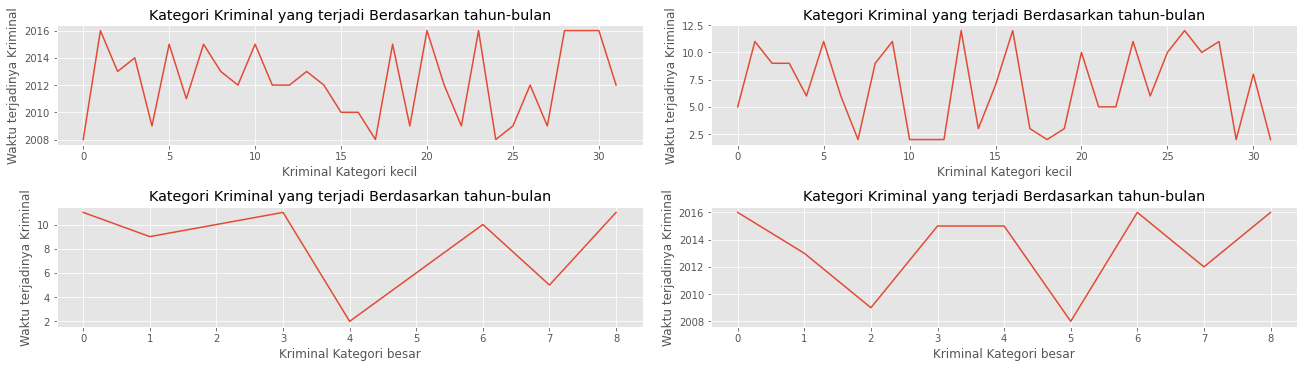

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 5), constrained_layout = True)

index = 0
xlabel = "Kriminal Kategori kecil"
for i in range(2):
  for j in range(2):
      ax[i,j].plot(list_group[index].index, list_value[index])
      ax[i,j].set_xlabel(xlabel)
      ax[i,j].set_ylabel("Waktu terjadinya Kriminal")
      ax[i,j].set_title("Kategori Kriminal yang terjadi Berdasarkan tahun-bulan")
      index +=1
  xlabel = "Kriminal Kategori besar"

Text(0.5, 0, 'Jenis kriminal kategori major')

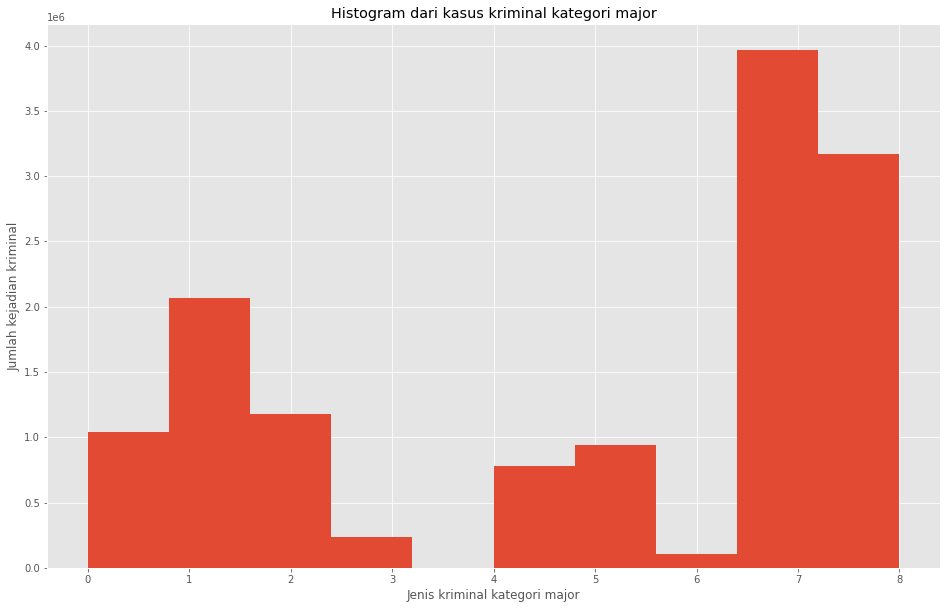

In [ ]:
new_df['major_category'].plot(kind='hist', figsize=(16, 10))
plt.title('Histogram dari kasus kriminal kategori major') 
plt.ylabel('Jumlah kejadian kriminal') # add y-label
plt.xlabel('Jenis kriminal kategori major') # add x-label

In [ ]:
count, bin_edges = np.histogram(new_df['minor_category'])
print(count)
print(bin_edges)

[1984176 1181520 1516428 1204848 1094688  787644 1122984 1552176 1070928
 1975212]
[ 0.   3.1  6.2  9.3 12.4 15.5 18.6 21.7 24.8 27.9 31. ]


Text(0.5, 0, 'Jenis kriminal kategori minor')

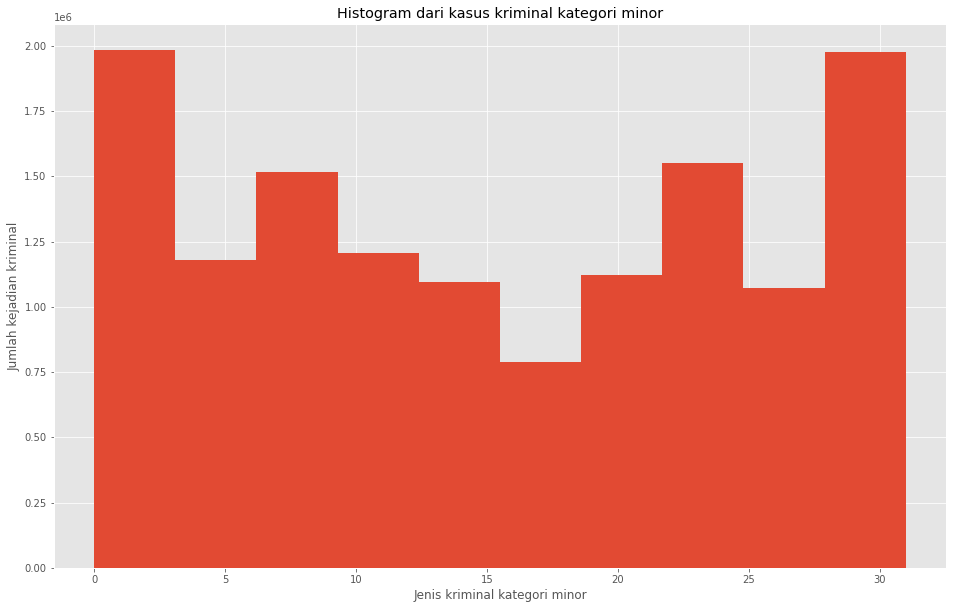

In [ ]:
new_df['minor_category'].plot(kind='hist', figsize=(16, 10))
plt.title('Histogram dari kasus kriminal kategori minor') 
plt.ylabel('Jumlah kejadian kriminal') # add y-label
plt.xlabel('Jenis kriminal kategori minor') # add x-label

# Pie Chart

In [ ]:
new_df.head()

,borough,major_category,minor_category,value,year,month
0,7,0,1,0,2016,11
1,10,8,23,0,2016,11
2,4,8,23,0,2015,5
3,25,0,1,0,2016,3
4,31,5,24,0,2008,6


In [ ]:
total_criminal_yearly = new_df[['value','year']]
total_criminal_monthly = new_df[['value','month']]

In [ ]:
total_criminal_monthly.groupby('month').sum().sort_values(by="value", ascending=False)

,value
month,
7,563076
10,558252
5,552704
3,551795
11,549671
6,549041
8,532784
1,530247
9,522377


In [ ]:
total_criminal_yearly.groupby('year').sum().sort_values(by="value", ascending=False)

,value
year,
2008,738641
2012,737329
2016,736121
2011,724915
2009,717214
2010,715324
2015,711624
2013,686407
2014,680183


In [ ]:
group6 = total_criminal_monthly.groupby('month').sum().sort_values(by="value", ascending=False)
group7 = total_criminal_yearly.groupby('year').sum().sort_values(by="value", ascending=False)

In [ ]:
list_group = list([group6,group7])
list_value = list([group6.values.reshape(12,),group7.values.reshape(9,)])
title=['Criminal in London Monthly', 'Criminal in London Yearly']

Pie Chart ini digunakan untuk melihat persebaran kriminal di london dalam jangkauan bulan dan tahun

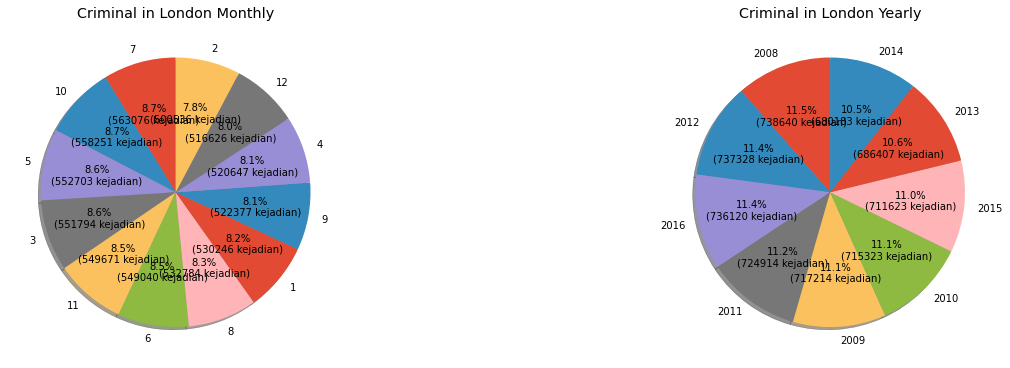

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,5), constrained_layout = True)

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} kejadian)".format(pct, absolute)

for i in range(2):
  ax[i].pie(list_value[i], 
            labels=list_group[i].index, 
            shadow=True, 
            autopct = lambda pct: func(pct, list_value[i]),
            startangle = 90)
  ax[i].set_title(title[i])

Dapat dilihat bahwa persebaran kriminal di London, Pada sisi sebelah kanan, di tahun 2014 kejadian kriminal di London menunjukkan angka yang sedikit, sedangkan di tahun 2008 menunjukkan tingginya angka kriminal di London.

Pada sisi sebelah kiri, di bulan ke-2 (Februari), Kejadian Kriminal di London menunjukkan angka yang sedikit, sedangkan di bulan ke-7 (Juli) menunjukkan angka kriminal yang paling tinggi di London

# Box Plot

In [ ]:
df.head()

,borough,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6


In [ ]:
new_bp_df = df[['borough','year','value']]
new_bp_df

,borough,year,value
0,Croydon,2016,0
1,Greenwich,2016,0
2,Bromley,2015,0
3,Redbridge,2016,0
4,Wandsworth,2008,0
...,...,...,...
13490599,Brent,2015,0
13490600,Hillingdon,2015,1
13490601,Sutton,2011,0
13490602,Croydon,2011,0


In [ ]:
np.unique(new_bp_df.borough)

array(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'City of London', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith and Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster'], dtype=object)

In [ ]:
borough_year = new_bp_df.groupby(['borough','year']).sum()
borough_year

value
borough              year       
Barking and Dagenham 2008  17656
                     2009  17713
                     2010  17130
                     2011  16686
                     2012  15990
...                          ...
Westminster          2012  59226
                     2013  53852
                     2014  47564
                     2015  47395
                     2016  48330

[297 rows x 1 columns]

In [ ]:
borough_year.values

array([[17656],
       [17713],
       [17130],
       [16686],
       [15990],
       [15759],
       [15426],
       [16346],
       [16741],
       [23944],
       [23449],
       [23416],
       [24007],
       [23573],
       [22510],
       [22572],
       [24036],
       [24684],
       [15305],
       [14445],
       [13166],
       [11325],
       [11669],
       [11552],
       [11844],
       [11990],
       [12840],
       [23504],
       [24748],
       [25512],
       [27669],
       [26357],
       [23759],
       [24426],
       [24883],
       [26693],
       [24015],
       [21858],
       [19572],
       [19868],
       [19622],
       [18945],
       [19668],
       [20637],
       [20164],
       [32010],
       [31612],
       [31804],
       [33956],
       [31472],
       [28435],
       [27198],
       [29477],
       [29183],
       [    0],
       [    0],
       [    0],
       [   69],
       [  157],
       [  110],
       [  115],
       [  151],
       [

In [ ]:
borough_year_new = pd.DataFrame(data=borough_year.values.reshape(9,33), index=list(map(str,range(2008,2017))), columns=np.unique(new_df.borough))
borough_year_new

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
2008,17656,17713,17130,16686,15990,15759,15426,16346,16741,23944,...,11552,11844,11990,12840,23504,24748,25512,27669,26357,23759
2009,24426,24883,26693,24015,21858,19572,19868,19622,18945,19668,...,0,69,157,110,115,151,178,29516,29784,29373
2010,29830,30189,27444,27357,28089,28712,28947,28617,31360,29537,...,22485,22010,19851,18626,18552,20028,18948,19894,20929,22730
2011,22004,20718,20175,21395,27095,25633,24893,26941,28265,21114,...,20705,22773,24626,27174,13774,13948,13945,12801,12803,11914
2012,11909,12601,13153,15395,14538,14957,15496,15965,15089,14734,...,19665,21105,22724,19749,20005,21286,22251,26273,25485,24693
2013,24980,26268,23784,24679,27032,27092,20663,18742,19481,19146,...,9983,31717,31225,31671,33224,33473,31868,31765,33164,34071
2014,27054,25182,24532,24201,23652,22074,21101,23437,23904,13875,...,27577,28005,29217,30090,20873,20837,20652,21994,21424,19793
2015,19590,18897,19502,11106,10618,10601,10896,11168,10439,10456,...,12032,11068,10948,10057,10443,10598,10658,23578,21959,23072
2016,24712,26784,26258,25504,27493,29253,24080,24761,24818,23714,...,23679,47846,48456,48116,54243,59226,53852,47564,47395,48330


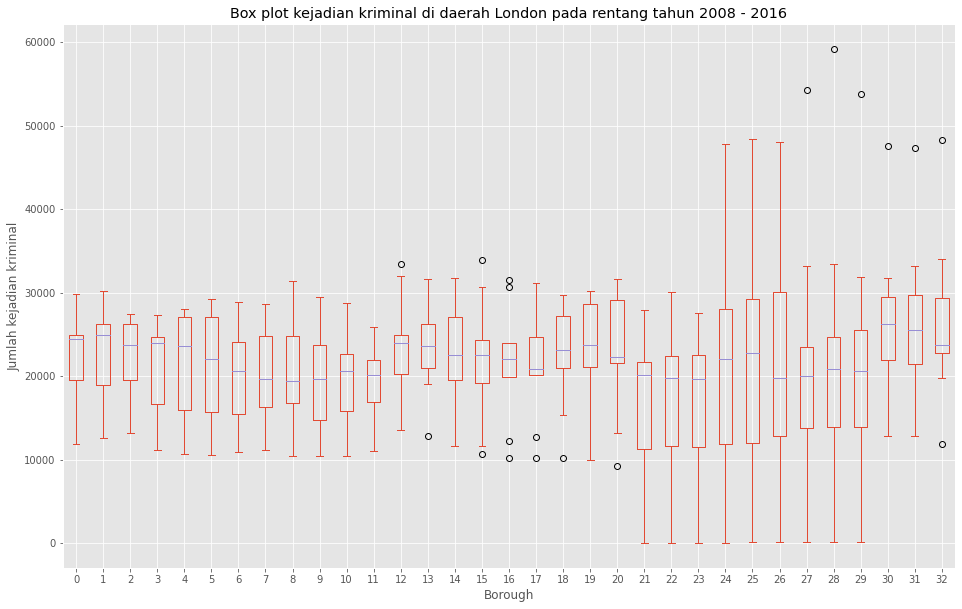

In [ ]:
borough_year_new.plot(kind='box', figsize=(16,10))
plt.title('Box plot kejadian kriminal di daerah London pada rentang tahun 2008 - 2016')
plt.xlabel('Borough')
plt.ylabel('Jumlah kejadian kriminal')
plt.show()

# Area Plot

In [ ]:
df_top5 = borough_year_new.head()

Text(0.5, 0, 'Years')

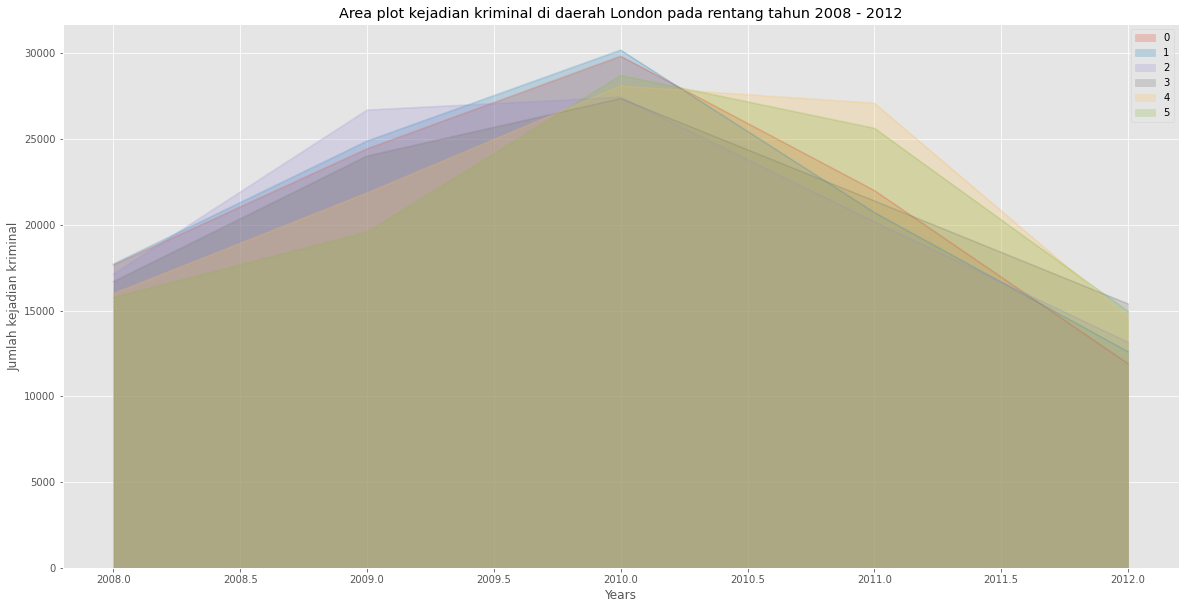

In [ ]:
df_top5.index = df_top5.index.map(int)
df_top5.iloc[:,:6].plot(kind='area', 
             stacked=False,
             figsize=(20, 10), 
             alpha=0.25
             )
plt.title('Area plot kejadian kriminal di daerah London pada rentang tahun 2008 - 2012')
plt.ylabel('Jumlah kejadian kriminal')
plt.xlabel('Years')

Text(0.5, 0, 'Years')

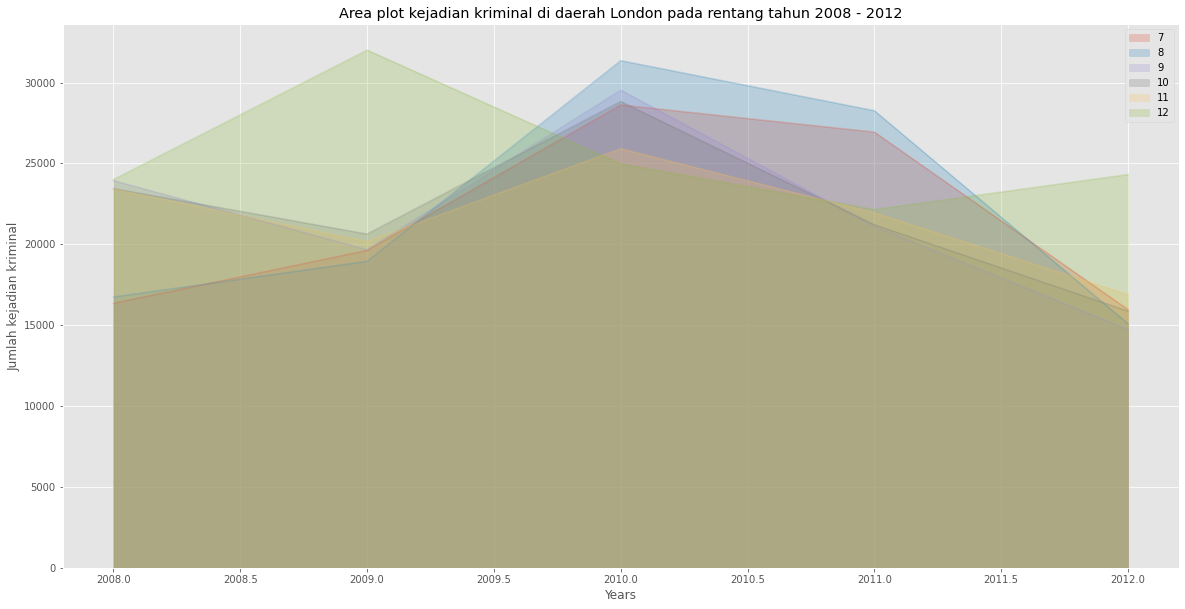

In [ ]:
df_top5.index = df_top5.index.map(int)
df_top5.iloc[:,7:13].plot(kind='area', 
             stacked=False,
             figsize=(20, 10), 
             alpha=0.25
             )
plt.title('Area plot kejadian kriminal di daerah London pada rentang tahun 2008 - 2012')
plt.ylabel('Jumlah kejadian kriminal')
plt.xlabel('Years')

Text(0.5, 0, 'Years')

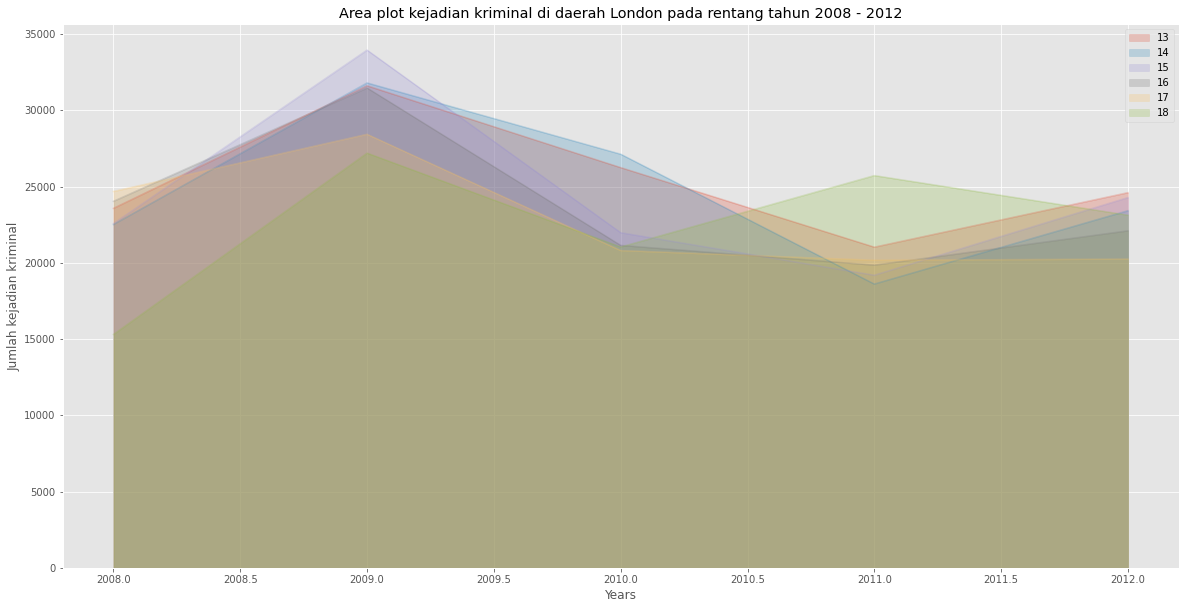

In [ ]:
df_top5.index = df_top5.index.map(int)
df_top5.iloc[:,13:19].plot(kind='area', 
             stacked=False,
             figsize=(20, 10), 
             alpha=0.25
             )
plt.title('Area plot kejadian kriminal di daerah London pada rentang tahun 2008 - 2012')
plt.ylabel('Jumlah kejadian kriminal')
plt.xlabel('Years')

Text(0.5, 0, 'Years')

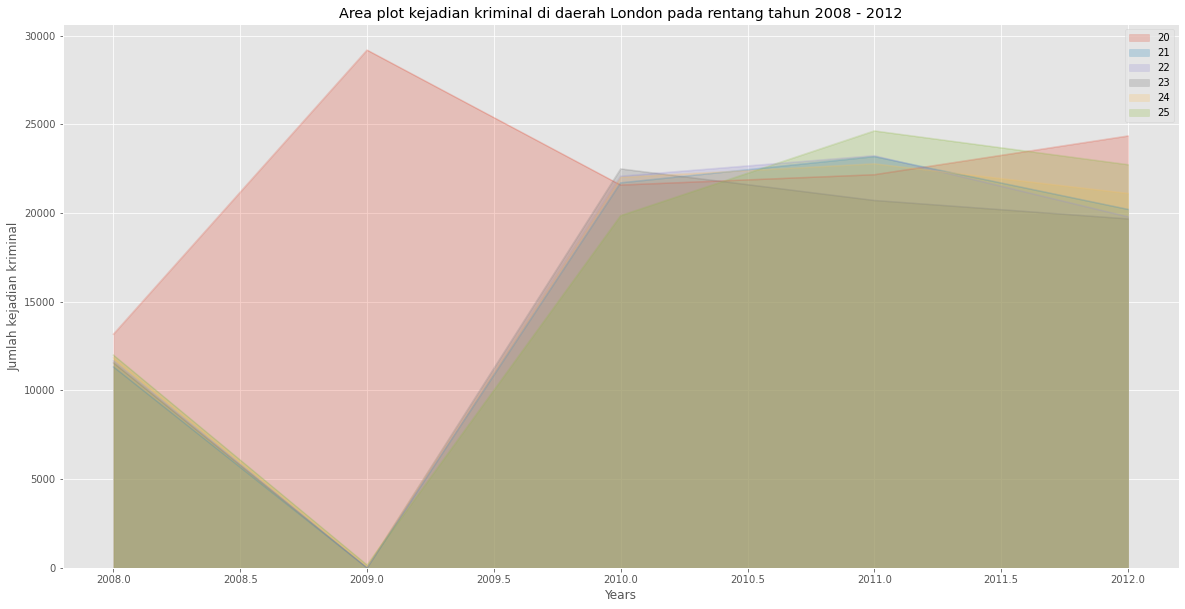

In [ ]:
df_top5.index = df_top5.index.map(int)
df_top5.iloc[:,20:26].plot(kind='area', 
             stacked=False,
             figsize=(20, 10), 
             alpha=0.25
             )
plt.title('Area plot kejadian kriminal di daerah London pada rentang tahun 2008 - 2012')
plt.ylabel('Jumlah kejadian kriminal')
plt.xlabel('Years')

Text(0.5, 0, 'Years')

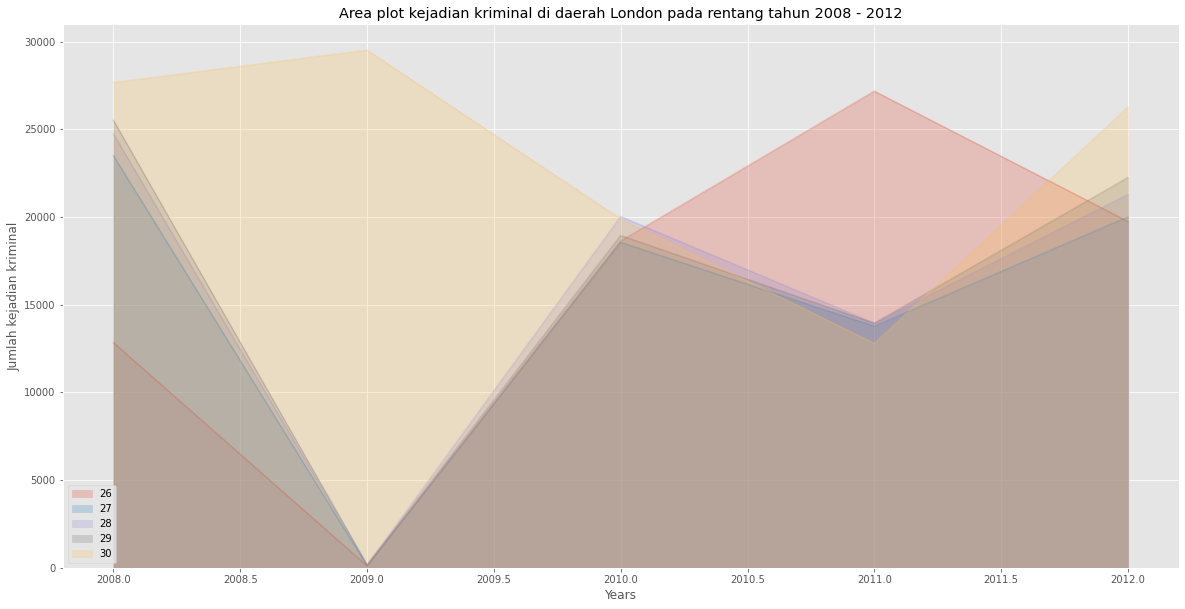

In [ ]:
df_top5.index = df_top5.index.map(int)
df_top5.iloc[:,26:31].plot(kind='area', 
             stacked=False,
             figsize=(20, 10), 
             alpha=0.25
             )
plt.title('Area plot kejadian kriminal di daerah London pada rentang tahun 2008 - 2012')
plt.ylabel('Jumlah kejadian kriminal')
plt.xlabel('Years')

# Scatter Plot

In [ ]:
new_df.head()

,borough,major_category,minor_category,value,year,month
0,7,0,1,0,2016,11
1,10,8,23,0,2016,11
2,4,8,23,0,2015,5
3,25,0,1,0,2016,3
4,31,5,24,0,2008,6


In [ ]:
year_value = new_df[['year','value']]
month_value = new_df[['month','value']]

In [ ]:
group8 = year_value.groupby(['year'], as_index=False).sum().sort_values(by='value',ascending=False)
group8.reset_index(inplace=True)
group8.drop(columns=['index'], inplace=True)
group8

,year,value
0,2008,738641
1,2012,737329
2,2016,736121
3,2011,724915
4,2009,717214
5,2010,715324
6,2015,711624
7,2013,686407
8,2014,680183


In [ ]:
group9 = month_value.groupby(['month'], as_index=False).sum().sort_values(by='value',ascending=False)
group9.reset_index(inplace=True)
group9.drop(columns=['index'], inplace=True)
group9

,month,value
0,7,563076
1,10,558252
2,5,552704
3,3,551795
4,11,549671
5,6,549041
6,8,532784
7,1,530247
8,9,522377
9,4,520648


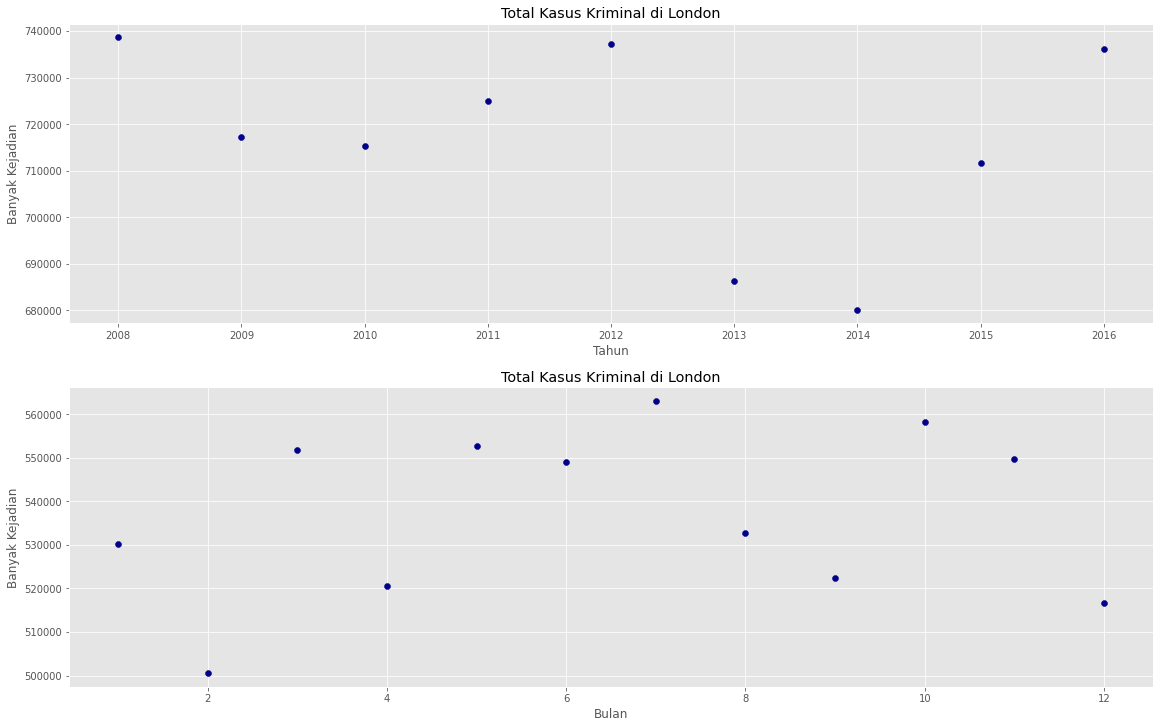

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16,10), constrained_layout = True)
xlabel = [group8.year, group9.month]
ylabel = [group8.value, group9.value]
xlabel2 = ['Tahun', 'Bulan']
for i in range (2):
  ax[i].scatter(x=xlabel[i], y=ylabel[i], color='darkblue')
  ax[i].set_xlabel(xlabel2[i])
  ax[i].set_ylabel("Banyak Kejadian")
  ax[i].set_title('Total Kasus Kriminal di London')

# Word Cloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
stopwords = set(STOPWORDS)

In [ ]:
df_wordclouds = df['major_category'].str.cat(sep=' ')

df_wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords
)

In [ ]:
# generate word cloud
df_wordcloud.generate(df_wordclouds)

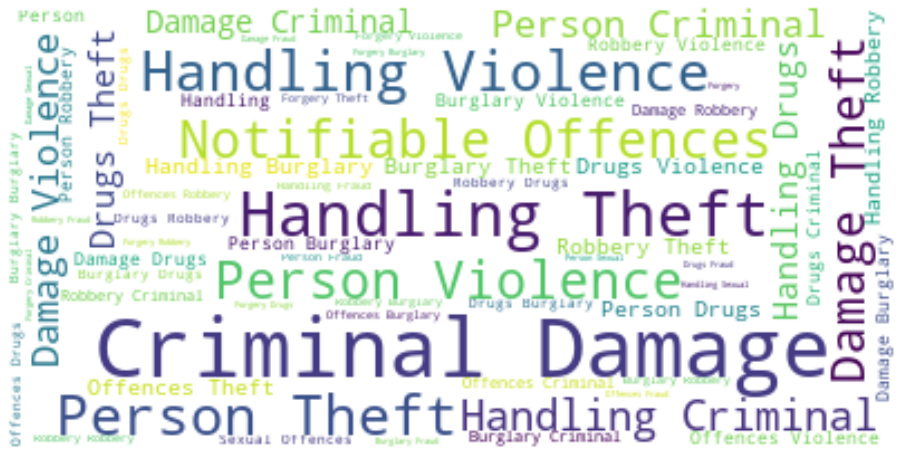

In [ ]:
plt.figure(figsize=(16,10))
plt.imshow(df_wordcloud, interpolation='bilinear')

plt.axis('off')
plt.show()

# Folium World

In [ ]:
import folium

In [ ]:
world_map = folium.Map()
world_map

# Kesimpulan

Kesimpulan yang dapat diambil dari dataset ini yaitu bahwa Kasus kriminal terjadi paling banyak pada tahun 2008 dan bulan Juli. Untuk daerah paling banyak kasus kriminalnya yaitu daerah Westminster	 dan yang paling sedikit kasus kriminalnya yaitu di City of London. Untuk persebaran kasus kriminalnya sendiri merata berkisar antara rentang 680.000 - 730.000 kejadian untuk tiap tahunnya dan 520.000 - 560.000 kejadian untuk tiap bulannya